In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import torch
from torchvision import transforms as T
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.utils.visualizer import Visualizer

In [2]:
cfg = get_cfg()
cfg.merge_from_file("configs/retinanet_R_50_FPN_3x.yaml")
cfg.INPUT.FORMAT = "RGB"

Loading config configs/./Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


In [3]:
predictor = DefaultPredictor(cfg)

In [4]:
img = Image.open("images/street.jpg")

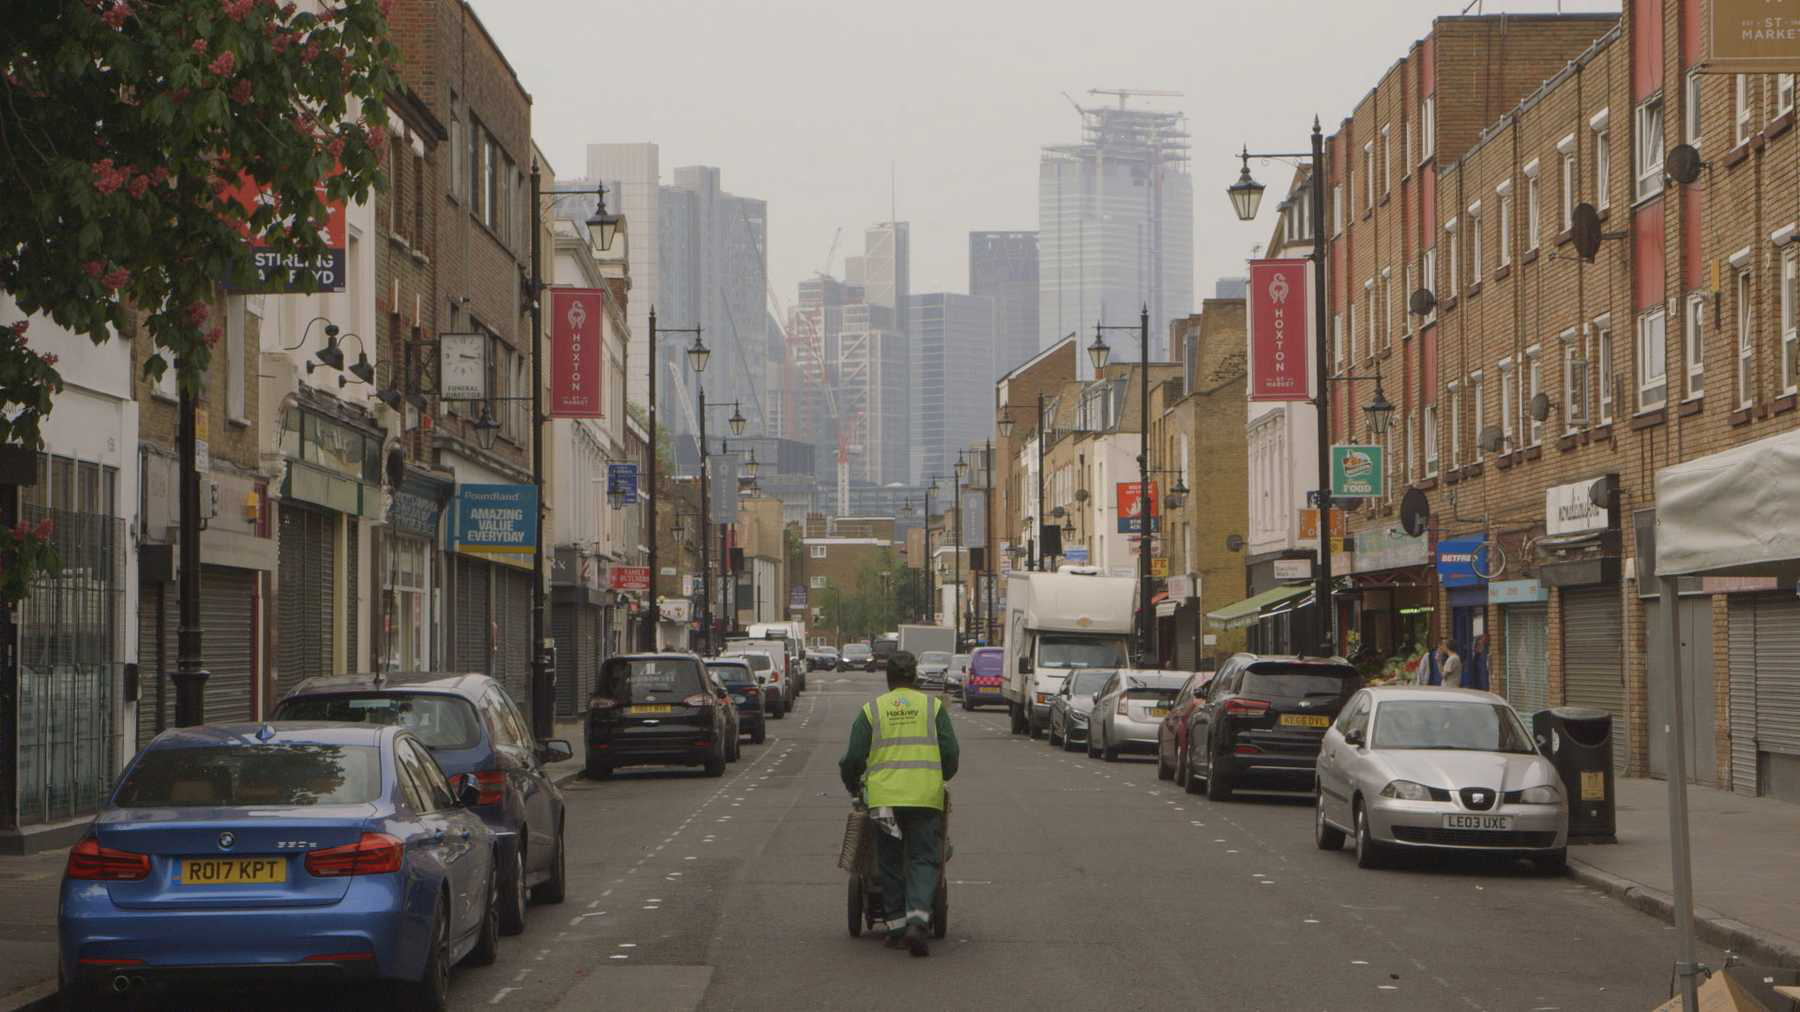

In [5]:
img

In [9]:
predictions = predictor(np.array(img))
print(predictions)

{'instances': Instances(num_instances=0, image_height=1012, image_width=1800, fields=[pred_boxes: Boxes(tensor([], device='cuda:0', size=(0, 4))), scores: tensor([], device='cuda:0'), pred_classes: tensor([], device='cuda:0', dtype=torch.int64)])}


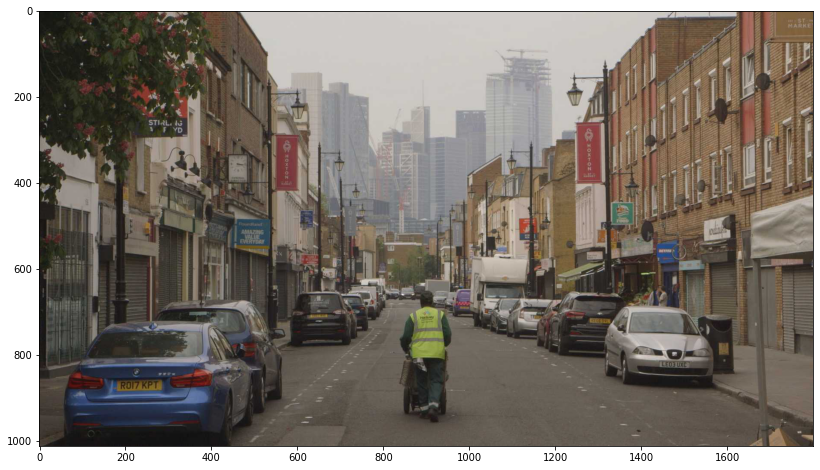

In [7]:
visualizer = Visualizer(np.array(img))
instances = predictions["instances"].to("cpu")
vis_img = visualizer.draw_instance_predictions(instances)
vis_img = vis_img.get_image()
plt.figure(figsize=(16, 8))
plt.imshow(vis_img)
plt.show()